<a href="https://colab.research.google.com/github/Yaninns/data_viz/blob/main/Vissualize_Data_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import os
from datetime import datetime as dt
from datetime import time

In [36]:
data = pd.read_csv('search_request.csv')
data.head()

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18.0,12.634739,101.463177
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10.0,14.800882,102.533777
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8.0,13.738260,100.371405
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12.0,12.666877,101.860838
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14.0,12.237242,99.879998


##เตรียมข้อมูล

In [ ]:
data['search_timestamp'] = pd.to_datetime(data['search_timestamp'], format='%Y-%m-%d %H:%M:%S',errors = 'coerce')
data

##Bar chart

###สร้างกราฟแท่งเปรียบเทียบปริมาณ คนเข้าใช้ Web Wongnai.com เพื่อค้นหาอาหารในแต่ละวัน

In [6]:
import pandas as pds
import matplotlib.pyplot as plt

In [7]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [8]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

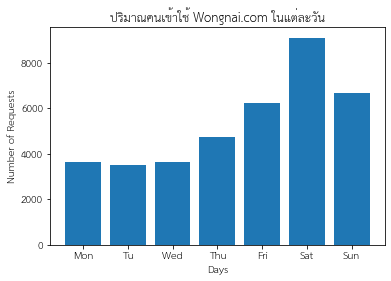

In [8]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 1].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 2].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 3].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 4].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 5].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 6].shape[0]
                         ],tick_label = ['Mon','Tu','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Days')
plt.ylabel('Number of Requests')
plt.title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน');

Grouped
แสดงปริมาณคนเข้าเว็บในแต่ละวัน โดยเปรียบเทียบช่วงเวลา 11.00-12.00 กับ 23.00-24.00

In [13]:
data[(data['search_timestamp'].dt.dayofweek == 0) 
& (data['search_timestamp'].dt.time < time(hour=12)) 
& (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]  # monday 11:00-12:00

300

In [14]:
b4lunch = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
                         ]

In [15]:
b4lunch

[300, 307, 336, 436, 489, 566, 619]

In [16]:
data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]

137

In [17]:
b4midnight = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
                         ]
b4midnight

[137, 90, 109, 177, 214, 268, 102]

In [18]:
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [9]:
import numpy as np

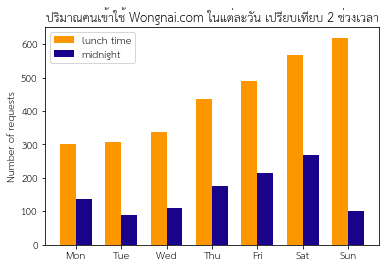

In [20]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, b4lunch, width, label='lunch time',color = '#fc9700')
rects2 = ax.bar(x + width/2, b4midnight, width, label='midnight',color = '#19038a')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

เรียนวันที่ 6 เมษายน 2564

###Stacked Bar Chart

NameError: ignored

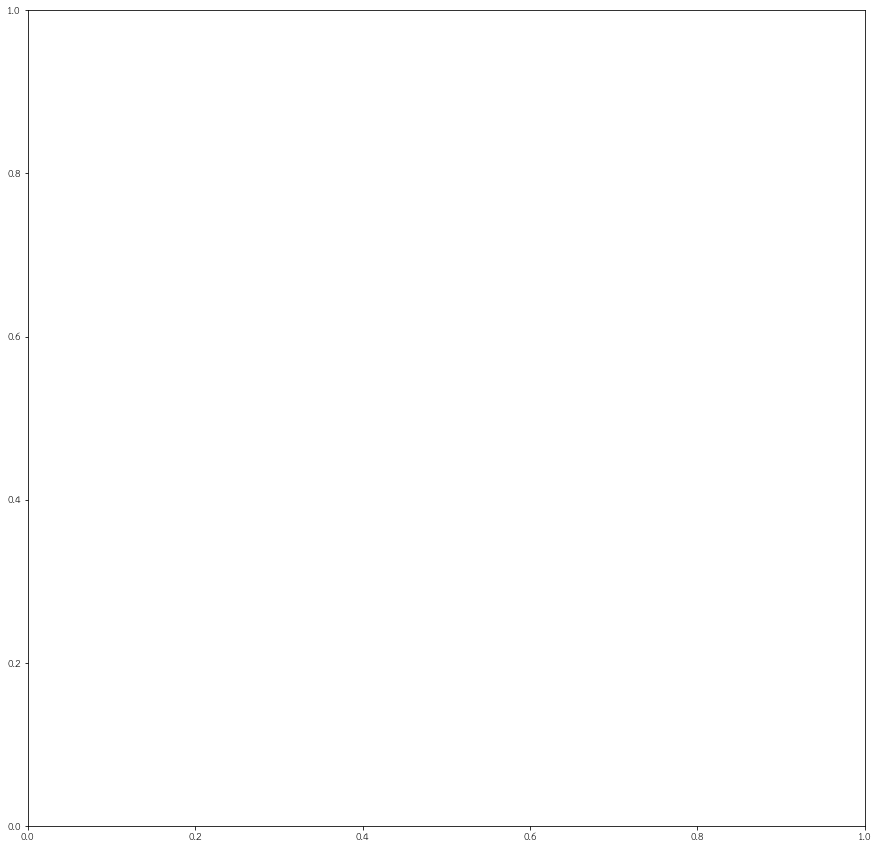

In [10]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, b4lunch, width, label='before lunch',color = '#fc9700')
ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight',color = '#19038a')

ax.set_ylabel('number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

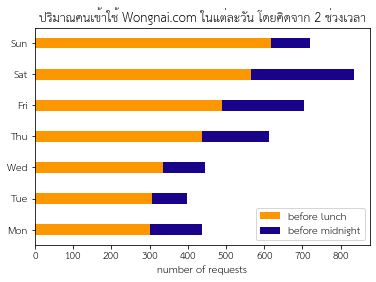

In [25]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels, b4lunch, width, label='before lunch',color = '#fc9700')
ax.barh(labels, b4midnight, width, left=b4lunch, label='before midnight',color = '#19038a')

ax.set_xlabel('number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

[เช็คชื่อ] โดยให้วาด Bar chart ที่เปรียบเทียบปริมาณคนใช้งาน wongnai.com สองช่วงเวลา โดยให้กราฟแสดงสัดส่วนของปริมาณคนใช้งานในแต่ละวันด้วย

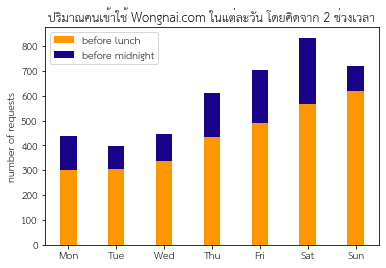

In [38]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, b4lunch, width, label='before lunch',color = '#fc9700')
ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight',color = '#19038a')

ax.set_ylabel('number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.show()

## histogram

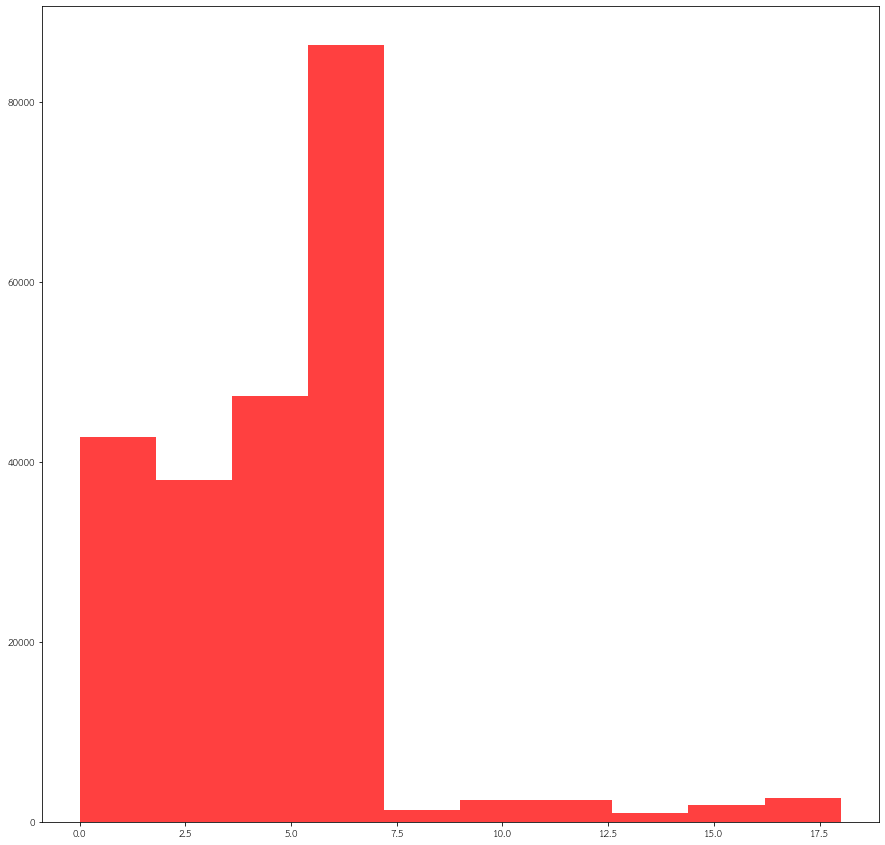

In [37]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[15,15]
output = plt.hist(list(data['number_of_result']),10,facecolor = 'red' ,alpha = 0.75)

##แก้ไขปัญหา แกนXไม่เรียงข้อมูล

In [12]:
data.dtypes

Unnamed: 0                   int64
search_id                   object
search_timestamp    datetime64[ns]
user_agent                  object
q                           object
user_id                    float64
session_id                  object
number_of_result             int64
lat                        float64
long                       float64
dtype: object

In [13]:
type(data['number_of_result'][0])

numpy.int64

In [14]:
type(data['number_of_result'][0]) == int

False


ตรวจสอบดูทุกๆค่าใน column 'number_of_result'

In [15]:
# for x in data['number_of_result']:
#     if type(x) != int:
#         print(f'{x} -> {type(x)}')

In [24]:
new_type = data['number_of_result'].astype('int32')


ลบ record ที่มีค่า ใน column 'number_of_result' เป็น number of result

In [25]:
data[data['number_of_result']=='number_of_result']

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long


In [26]:
data = data.drop(1000016)

KeyError: ignored

In [27]:
data[data['number_of_result']=='number_of_result']

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long


In [28]:
new_type = data['number_of_result'].astype('int32')

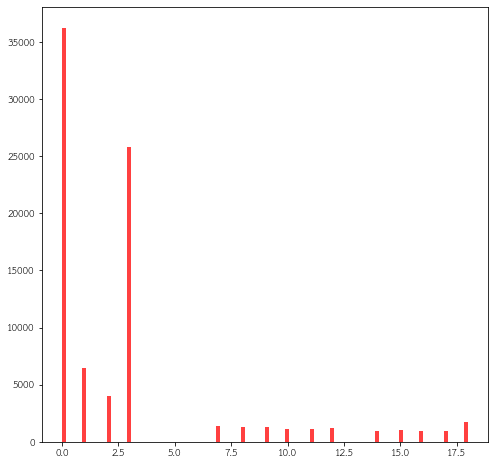

In [29]:
output = plt.hist(new_type,100,facecolor = 'red' ,alpha = 0.75)


ลบ outlier

In [30]:
new_type_nooutlier = new_type[new_type < 25]

In [31]:
new_type.shape[0] - new_type_nooutlier.shape[0]

0

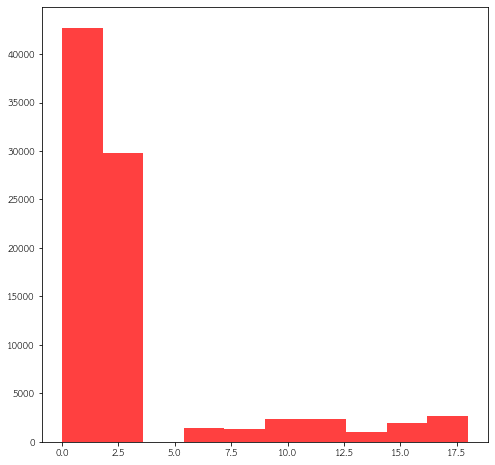

In [32]:
matplotlib.rcParams['figure.figsize']=[8,8]
output = plt.hist(new_type_nooutlier,10,facecolor = 'red' ,alpha = 0.75)

Quiz7 เปียบเทียบความถี่ของแท่งที่มากที่สุดกับแท่งอื่นๆรวมกัน

กราฟหนูไม่เหมือนอาจารย์ TT